In [33]:
from itertools import cycle, islice

from modandcrypt import *

<center>

# Crittografia 

## &amp;

# Aritmetica modulare

&nbsp;

&nbsp;

&nbsp;

### Massimo Santini

</center>

<center>

# Cosa

</center>

<img src="./img/scitala.png" style="width: 40%; margin: auto; display: block;" />

<center>

# Come

</center>

<img src="./img/cow.png" style="width: 40%; margin: auto; display: block;" />

<center>

# Perché

</center>

<img src="./img/Gauss.png" style="width: 40%; margin: auto; display: block;" />

> Queste note sono generate a partire da un notebook [Jupyter](https://jupyter.org/)
> disponibile su [GitHub](https://github.com/mapio/modandcrypt).
> In particolare, molto del materiale qui visualizzato è prodotto da del codice in 
> [Python](https://www.python.org/) sviluppato appositamente e distribuito in modalità
> *open source* e che quindi potete liberamente studiare, modificare e distribuire.
> Se vi piace programmare, date una occhiata!

<img src="./img/qr.png" style="width: 40%; margin: auto; display: block;" />

<center>

# Crittografia

## A chiave simmetrica

</center>

<img src="./img/parties.png" style="width: 90%; margin: auto; display: block;" />

$$\Huge C(p, k) = c \qquad\text{e}\qquad D(c, k) = p$$

$$\Huge D(C(p, k), k) = p$$

$$\Huge D(c) = p$$

<center>

# Monoalfabetica

</center>

<img src="./img/ruota.png" style="width: 50%; margin: auto; display: block;" />

In [34]:
pos = list(range(NUM_SEMPLICI))
n = 6
tabella([
  SEMPLICI_VISUALIZZABILI[:n] + ['…'] + SEMPLICI_VISUALIZZABILI[-n:], 
  pos[:n] + ['…'] + pos[-n:]
], index = sgr(['lettera', 'posizione']))

┌───────────┬───┬───┬───┬───┬───┬───┬───┬────┬────┬────┬────┬────┬────┐
│ lettera   │ A │ B │ C │ D │ E │ F │ … │ W  │ X  │ Y  │ Z  │ ␢  │ ↩  │
├───────────┼───┼───┼───┼───┼───┼───┼───┼────┼────┼────┼────┼────┼────┤
│ posizione │ 0 │ 1 │ 2 │ 3 │ 4 │ 5 │ … │ 22 │ 23 │ 24 │ 25 │ 26 │ 27 │
└───────────┴───┴───┴───┴───┴───┴───┴───┴────┴────┴────┴────┴────┴────┘


In [35]:
testo = 'BELLA ZIO'
tabella([testo, a_posizioni(testo)], index = sgr(['testo','posizioni']))

┌───────────┬───┬───┬────┬────┬───┬────┬────┬───┬────┐
│ testo     │ B │ E │ L  │ L  │ A │    │ Z  │ I │ O  │
├───────────┼───┼───┼────┼────┼───┼────┼────┼───┼────┤
│ posizioni │ 1 │ 4 │ 11 │ 11 │ 0 │ 26 │ 25 │ 8 │ 14 │
└───────────┴───┴───┴────┴────┴───┴────┴────┴───┴────┘


In [36]:
tabella([
  a_posizioni(testo), 
  [3] * len(testo), 
  orologio_somma(a_posizioni(testo), [3] * len(testo))
], index = sgr(['a', 'b', 'a + b']))

┌───────┬───┬───┬────┬────┬───┬────┬────┬────┬────┐
│ a     │ 1 │ 4 │ 11 │ 11 │ 0 │ 26 │ 25 │  8 │ 14 │
├───────┼───┼───┼────┼────┼───┼────┼────┼────┼────┤
│ b     │ 3 │ 3 │  3 │  3 │ 3 │  3 │  3 │  3 │  3 │
├───────┼───┼───┼────┼────┼───┼────┼────┼────┼────┤
│ a + b │ 4 │ 7 │ 14 │ 14 │ 3 │  1 │  0 │ 11 │ 17 │
└───────┴───┴───┴────┴────┴───┴────┴────┴────┴────┘


In [37]:
c = cifra(testo, 'D')

┌───┬─────┬─────┬──────┬──────┬─────┬─────┬──────┬──────┬──────┐
│ p │ B:1 │ E:4 │ L:11 │ L:11 │ A:0 │ :26 │ Z:25 │ I:8  │ O:14 │
├───┼─────┼─────┼──────┼──────┼─────┼─────┼──────┼──────┼──────┤
│ k │ D:3 │ D:3 │ D:3  │ D:3  │ D:3 │ D:3 │ D:3  │ D:3  │ D:3  │
├───┼─────┼─────┼──────┼──────┼─────┼─────┼──────┼──────┼──────┤
│ c │ E:4 │ H:7 │ O:14 │ O:14 │ D:3 │ B:1 │ A:0  │ L:11 │ R:17 │
└───┴─────┴─────┴──────┴──────┴─────┴─────┴──────┴──────┴──────┘


In [38]:
print(c) 

EHOODBALR


In [39]:
d = decifra(c, 'D')

┌───┬──────┬──────┬──────┬──────┬──────┬──────┬──────┬──────┬──────┐
│ c │ E:4  │ H:7  │ O:14 │ O:14 │ D:3  │ B:1  │ A:0  │ L:11 │ R:17 │
├───┼──────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┤
│ k │ Z:25 │ Z:25 │ Z:25 │ Z:25 │ Z:25 │ Z:25 │ Z:25 │ Z:25 │ Z:25 │
├───┼──────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┤
│ p │ B:1  │ E:4  │ L:11 │ L:11 │ A:0  │ :26  │ Z:25 │ I:8  │ O:14 │
└───┴──────┴──────┴──────┴──────┴──────┴──────┴──────┴──────┴──────┘


In [40]:
print(d)

BELLA ZIO


In [41]:
def C(p, k):
  return da_posizioni(
    orologio_somma(
      a_posizioni(p), 
      a_posizioni(k)
    )
  )

In [42]:
def D(c, k):
  return da_posizioni(
    orologio_somma(
      a_posizioni(c), 
      a_posizioni(
        inverti(k)
      )
    )
  )

In [43]:
p = 'BELLA ZIO'
k = 'D'

In [44]:
c = C(p, k)
print(c)

EHOODBALR


In [45]:
d = D(c, k)
print(d)

BELLA ZIO


<center>

# Crittoanalisi

</center>

<center>

## Forza bruta

</center>

In [46]:
vals = [[a_visualizzazione(k), a_visualizzazione(D(c, k))] for k in SEMPLICI]
tabella(vals[:5] + [['…', '…']] + vals[-2:], header = sgr(['k', 'D(c, k)']))

┌─────┬───────────┐
│ k   │ D(c, k)   │
├─────┼───────────┤
│ A   │ EHOODBALR │
├─────┼───────────┤
│ B   │ DGNNCA↩KQ │
├─────┼───────────┤
│ C   │ CFMMB↩␢JP │
├─────┼───────────┤
│ D   │ BELLA␢ZIO │
├─────┼───────────┤
│ E   │ ADKK↩ZYHN │
├─────┼───────────┤
│ …   │ …         │
├─────┼───────────┤
│ ␢   │ GJQQFDCNT │
├─────┼───────────┤
│ ↩   │ FIPPECBMS │
└─────┴───────────┘


In [47]:
for k in SEMPLICI[:10]:
  print(a_visualizzazione((D(c, k))))

EHOODBALR
DGNNCA↩KQ
CFMMB↩␢JP
BELLA␢ZIO
ADKK↩ZYHN
↩CJJ␢YXGM
␢BIIZXWFL
ZAHHYWVEK
Y↩GGXVUDJ
X␢FFWUTCI


<center>

## Analisi frequenziale

### Da "I promessi sposi"

</center>

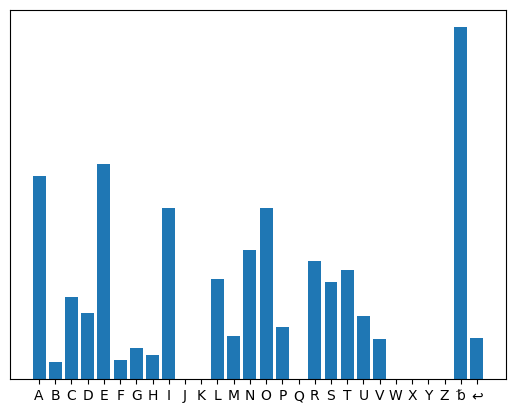

In [48]:
PROMESSI_SPOSI = da_gutenberg('https://www.gutenberg.org/cache/epub/45334/pg45334.txt')
istogramma_lettere(PROMESSI_SPOSI)

In [49]:
pps = semplifica("""
Tutt'e due si volsero a chi ne sapeva piu' di loro, e da cui 
aspettavano uno schiarimento, il quale non poteva essere che 
doloroso: tutt'e due, lasciando travedere, in mezzo al dolore, 
e con l'amore diverso che ognun d'essi portava a Lucia.
""")
print(pps)



TUTTE DUE SI VOLSERO A CHI NE SAPEVA PIU DI LORO E DA CUI 
ASPETTAVANO UNO SCHIARIMENTO IL QUALE NON POTEVA ESSERE CHE 
DOLOROSO TUTTE DUE LASCIANDO TRAVEDERE IN MEZZO AL DOLORE 
E CON LAMORE DIVERSO CHE OGNUN DESSI PORTAVA A LUCIA



In [50]:
c = C(pps, 'G')
print(c)

FZ ZZKEJ KEYOE
URYKXUEGEINOETKEYGVK
GEVO EJOERUXUEKEJGEI OEFGYVKZZG
GTUE TUEYINOGXOSKTZUEOREW GRKETUTEVUZK
GEKYYKXKEINKEFJURUXUYUEZ ZZKEJ KERGYIOGTJUEZXG
KJKXKEOTESKDDUEGREJURUXKEFKEIUTERGSUXKEJO
KXYUEINKEUMT TEJKYYOEVUXZG
GEGER IOGF


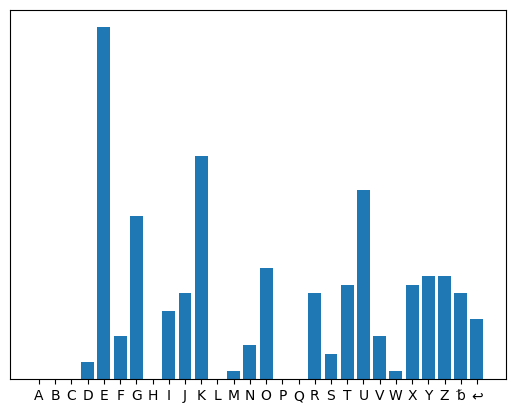

In [51]:
istogramma_lettere(c)

In [52]:
print(D(c, 'G'))


TUTTE DUE SI VOLSERO A CHI NE SAPEVA PIU DI LORO E DA CUI 
ASPETTAVANO UNO SCHIARIMENTO IL QUALE NON POTEVA ESSERE CHE 
DOLOROSO TUTTE DUE LASCIANDO TRAVEDERE IN MEZZO AL DOLORE 
E CON LAMORE DIVERSO CHE OGNUN DESSI PORTAVA A LUCIA



<center>

# Polialfabetica

</center>

<img src="./img/Vigenere.png" style="width: 50%; margin: auto; display: block;" />

In [53]:
testo = 'BELLA ZIO'
chiave = 'CIAO'
tabella([
  a_posizioni(testo), 
  islice(cycle(a_posizioni(chiave)), len(testo)), 
  orologio_somma(a_posizioni(testo), a_posizioni(chiave))
], index = sgr(['a', 'b', 'a + b']))

┌───────┬───┬────┬────┬────┬───┬────┬────┬────┬────┐
│ a     │ 1 │  4 │ 11 │ 11 │ 0 │ 26 │ 25 │  8 │ 14 │
├───────┼───┼────┼────┼────┼───┼────┼────┼────┼────┤
│ b     │ 2 │  8 │  0 │ 14 │ 2 │  8 │  0 │ 14 │  2 │
├───────┼───┼────┼────┼────┼───┼────┼────┼────┼────┤
│ a + b │ 3 │ 12 │ 11 │ 25 │ 2 │  6 │ 25 │ 22 │ 16 │
└───────┴───┴────┴────┴────┴───┴────┴────┴────┴────┘


In [54]:
c = cifra(testo, chiave)
print(c)

┌───┬─────┬──────┬──────┬──────┬─────┬─────┬──────┬──────┬──────┐
│ p │ B:1 │ E:4  │ L:11 │ L:11 │ A:0 │ :26 │ Z:25 │ I:8  │ O:14 │
├───┼─────┼──────┼──────┼──────┼─────┼─────┼──────┼──────┼──────┤
│ k │ C:2 │ I:8  │ A:0  │ O:14 │ C:2 │ I:8 │ A:0  │ O:14 │ C:2  │
├───┼─────┼──────┼──────┼──────┼─────┼─────┼──────┼──────┼──────┤
│ c │ D:3 │ M:12 │ L:11 │ Z:25 │ C:2 │ G:6 │ Z:25 │ W:22 │ Q:16 │
└───┴─────┴──────┴──────┴──────┴─────┴─────┴──────┴──────┴──────┘
DMLZCGZWQ


In [55]:
print(C(pps, 'CIAO'))

B
UFVM RWM EKGVAN EDQGAMEPIMPM ECXEHCGPWWGDWATODQGEMFI QWQ NC PSV
AHCVOMWVOMUKHWCZI GVTAAQLMSAAZGGNAPGPAVMVOAMSEGZEMEPEMBLOZQZOEQGTGV
EMFAEMNISQKINRQGTDCBERGZEMKV  GFZAAILMFWLATM NGGCAPGLOOWRSALIHGZSAAKHSAWG
WV RG SWAXODVIVOAI ZWKIOB


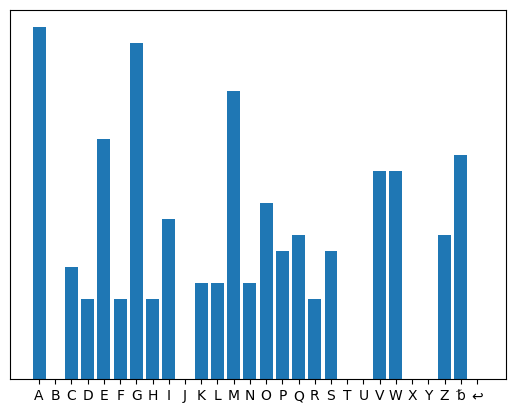

In [56]:
istogramma_lettere(C(pps, chiave))

<center>

## Perfetta!

</center>

<img src="./img/otp.png" style="width: 80%; margin: auto; display: block;" />

<center>

# E ora… magia!

### Scambiare le chiavi senza canale sicuro

</center>

<img src="./img/parties-ns.png" style="width: 90%; margin: auto; display: block;" />

<img src="./img/dh-ke.png" style="width: 40%; margin: auto; display: block;" />

<img src="./img/mdh.jpeg" style="width: 80%; margin: auto; display: block;" />

<center>

# Aritmetica modulare

</center>

<img src="./img/disqvisitiones.jpeg" style="width: 40%; margin: auto; display: block;" />

$$\Huge \left(\mathbb{Z}, +, \cdot\right)$$

&nbsp;

$$\Huge \mod n$$

&nbsp;

$$\Huge
\begin{split}
[r]_n  & \triangleq \{z \mid z = k\cdot n + r, \quad k \in\mathbb{Z}\} \\
       & = \{z \mid z \equiv r \pmod n\} \\
       & = \{z \mid z \mathbin{\%} n = r\}
\end{split}
$$

$$\Huge [3]_8 = \{\ldots, -13, -5, 3, 11, 19,\ldots\}$$

&nbsp;

$$\Huge [-5]_8 = \{\ldots, -21, -13, -5, 3, 11,\ldots\}$$

&nbsp;

$$\Huge
[r]_n = [r + k \cdot n]_n
$$

$$\Huge \mathbb{Z}_n \triangleq \{[0]_n, [1]_n, [2]_n, \ldots, [n-1]_n\}$$

&nbsp;

$$\Huge (\mathbb{Z}_n, +, \cdot)$$

$$\Huge [r] + [s] \triangleq [r + s]$$

In [57]:
Mod(8).somma()

┌─────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┐
│ +   │ [0]   │ [1]   │ [2]   │ [3]   │ [4]   │ [5]   │ [6]   │ [7]   │
├─────┼───────┼───────┼───────┼───────┼───────┼───────┼───────┼───────┤
│ [0] │ [0]   │ [1]   │ [2]   │ [3]   │ [4]   │ [5]   │ [6]   │ [7]   │
├─────┼───────┼───────┼───────┼───────┼───────┼───────┼───────┼───────┤
│ [1] │ [1]   │ [2]   │ [3]   │ [4]   │ [5]   │ [6]   │ [7]   │ [0]   │
├─────┼───────┼───────┼───────┼───────┼───────┼───────┼───────┼───────┤
│ [2] │ [2]   │ [3]   │ [4]   │ [5]   │ [6]   │ [7]   │ [0]   │ [1]   │
├─────┼───────┼───────┼───────┼───────┼───────┼───────┼───────┼───────┤
│ [3] │ [3]   │ [4]   │ [5]   │ [6]   │ [7]   │ [0]   │ [1]   │ [2]   │
├─────┼───────┼───────┼───────┼───────┼───────┼───────┼───────┼───────┤
│ [4] │ [4]   │ [5]   │ [6]   │ [7]   │ [0]   │ [1]   │ [2]   │ [3]   │
├─────┼───────┼───────┼───────┼───────┼───────┼───────┼───────┼───────┤
│ [5] │ [5]   │ [6]   │ [7]   │ [0]   │ [1]   │ [2]   │ [3]   │ 

$$\Huge [r] \cdot [s] \triangleq [r \cdot s]$$

In [58]:
Mod(8).prodotto()

┌─────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┐
│ *   │ [1]   │ [2]   │ [3]   │ [4]   │ [5]   │ [6]   │ [7]   │
├─────┼───────┼───────┼───────┼───────┼───────┼───────┼───────┤
│ [1] │ [1]   │ [2]   │ [3]   │ [4]   │ [5]   │ [6]   │ [7]   │
├─────┼───────┼───────┼───────┼───────┼───────┼───────┼───────┤
│ [2] │ [2]   │ [4]   │ [6]   │ [0]   │ [2]   │ [4]   │ [6]   │
├─────┼───────┼───────┼───────┼───────┼───────┼───────┼───────┤
│ [3] │ [3]   │ [6]   │ [1]   │ [4]   │ [7]   │ [2]   │ [5]   │
├─────┼───────┼───────┼───────┼───────┼───────┼───────┼───────┤
│ [4] │ [4]   │ [0]   │ [4]   │ [0]   │ [4]   │ [0]   │ [4]   │
├─────┼───────┼───────┼───────┼───────┼───────┼───────┼───────┤
│ [5] │ [5]   │ [2]   │ [7]   │ [4]   │ [1]   │ [6]   │ [3]   │
├─────┼───────┼───────┼───────┼───────┼───────┼───────┼───────┤
│ [6] │ [6]   │ [4]   │ [2]   │ [0]   │ [6]   │ [4]   │ [2]   │
├─────┼───────┼───────┼───────┼───────┼───────┼───────┼───────┤
│ [7] │ [7]   │ [6]   │ [5]   │ [4]   │ 

In [59]:
Mod(7).prodotto()

┌─────┬───────┬───────┬───────┬───────┬───────┬───────┐
│ *   │ [1]   │ [2]   │ [3]   │ [4]   │ [5]   │ [6]   │
├─────┼───────┼───────┼───────┼───────┼───────┼───────┤
│ [1] │ [1]   │ [2]   │ [3]   │ [4]   │ [5]   │ [6]   │
├─────┼───────┼───────┼───────┼───────┼───────┼───────┤
│ [2] │ [2]   │ [4]   │ [6]   │ [1]   │ [3]   │ [5]   │
├─────┼───────┼───────┼───────┼───────┼───────┼───────┤
│ [3] │ [3]   │ [6]   │ [2]   │ [5]   │ [1]   │ [4]   │
├─────┼───────┼───────┼───────┼───────┼───────┼───────┤
│ [4] │ [4]   │ [1]   │ [5]   │ [2]   │ [6]   │ [3]   │
├─────┼───────┼───────┼───────┼───────┼───────┼───────┤
│ [5] │ [5]   │ [3]   │ [1]   │ [6]   │ [4]   │ [2]   │
├─────┼───────┼───────┼───────┼───────┼───────┼───────┤
│ [6] │ [6]   │ [5]   │ [4]   │ [3]   │ [2]   │ [1]   │
└─────┴───────┴───────┴───────┴───────┴───────┴───────┘


In [60]:
Mod(8).prodotto_coprimi()

┌─────┬───────┬───────┬───────┬───────┐
│ *   │ [1]   │ [3]   │ [5]   │ [7]   │
├─────┼───────┼───────┼───────┼───────┤
│ [1] │ [1]   │ [3]   │ [5]   │ [7]   │
├─────┼───────┼───────┼───────┼───────┤
│ [3] │ [3]   │ [1]   │ [7]   │ [5]   │
├─────┼───────┼───────┼───────┼───────┤
│ [5] │ [5]   │ [7]   │ [1]   │ [3]   │
├─────┼───────┼───────┼───────┼───────┤
│ [7] │ [7]   │ [5]   │ [3]   │ [1]   │
└─────┴───────┴───────┴───────┴───────┘


$$\Huge [r] \cdot [s] = [1]$$

&nbsp;

$$\Huge [s] = [r]^{-1}$$

<img src="./img/Bezout.jpeg" style="width: 40%; margin: auto; display: block;" />

$$\Huge r \cdot s + k\cdot n = \operatorname{MCD}(r, n)$$

&nbsp;

$$\Huge \operatorname{EG}(r, n) \to s, k$$

In [61]:
def EG(r, n):
  s0, s1, k0, k1 = 1, 0, 0, 1
  while n != 0:
    q, r, n = r // n, n, r % b
    s0, s1 = s1, s0 - q * s1
    k0, k1 = k1, k0 - q * k1
  return r, s0, k0

$$\Huge \operatorname{MCD}(r, n) = 1 \quad\Rightarrow\quad r \cdot s + k\cdot n = 1$$

&nbsp;

$$\Huge r\cdot s = 1 - k\cdot n$$

&nbsp;

$$\Huge [r\cdot s]_n = [1]_n$$

&nbsp;

$$\Huge [s]_n = [r]^{-1}_n$$

$$\Huge [r]^e \triangleq [r^e]$$

In [62]:
Mod(7).generatori()

┌──────┬─────┬─────┬─────┬─────┬─────┬─────┐
│ **   │ 1   │ 2   │ 3   │ 4   │ 5   │ 6   │
├──────┼─────┼─────┼─────┼─────┼─────┼─────┤
│ [1]  │ [1] │     │     │     │     │     │
├──────┼─────┼─────┼─────┼─────┼─────┼─────┤
│ [2]  │ [2] │ [4] │ [1] │     │     │     │
├──────┼─────┼─────┼─────┼─────┼─────┼─────┤
│ [3]  │ [3] │ [2] │ [6] │ [4] │ [5] │ [1] │
├──────┼─────┼─────┼─────┼─────┼─────┼─────┤
│ [4]  │ [4] │ [2] │ [1] │     │     │     │
├──────┼─────┼─────┼─────┼─────┼─────┼─────┤
│ [5]  │ [5] │ [4] │ [6] │ [2] │ [3] │ [1] │
├──────┼─────┼─────┼─────┼─────┼─────┼─────┤
│ [6]  │ [6] │ [1] │     │     │     │     │
└──────┴─────┴─────┴─────┴─────┴─────┴─────┘


$$\Huge [y]_p = [g]_p^x$$

&nbsp;

$$\Huge \widehat\exp: x \to [y]_p$$ 

&nbsp;

$$\Huge \widehat\log: [y]_p \to x$$

In [63]:
def expm(b, e, m):
  r = 1
  while e > 0:
    if e % 2 == 1: r = (r * b) % m
    b = (b * b) % m
    e = e // 2
  return r

<img src="./img/dh-ke.png" style="width: 40%; margin: auto; display: block;" />

$$\Huge
\begin{split}
a \quad \Rightarrow \quad A = [g^a]_p \\
b \quad \Rightarrow \quad B = [g^b]_p
\end{split}
$$

&nbsp;

$$\Huge
\begin{split} 
B^a &= [g^b]^a = \left([g]^b\right)^a = [g]^{ba} \\
A^b &= [g^a]^b = \left([g]^a\right)^b = [g]^{ab}
\end{split}
$$

&nbsp;

$$\Huge [g]^{ba} = [g]^{ab}$$


In [64]:
p = 2963
g = 51

M = Mod(p)

len(M[g].potenze()) == p - 1

True

In [65]:
a = 123
A = M[g] ** a
A

[2149]

In [66]:
b = 345
B = M[g] ** b
B

[2940]

In [67]:
B ** a, B ** a 

([2413], [2413])

<img src="./img/k7.png" style="width: 40%; margin: auto; display: block;" />

<center>

# Ancora più magia!

## Crittografia asimmetrica

</center>

$$\Huge f([m]_n, x) \triangleq [m]_n^x$$

&nbsp;

$$\Huge p, q, e \mapsto n, d$$

&nbsp;

$$\Huge f(f([m]_n, e), d) = [m]^{ed}_n = [m]_n$$

&nbsp;

$$\Huge D(C([m]_n, e), d) = [m]_n$$

$$\Huge n = p \cdot q$$

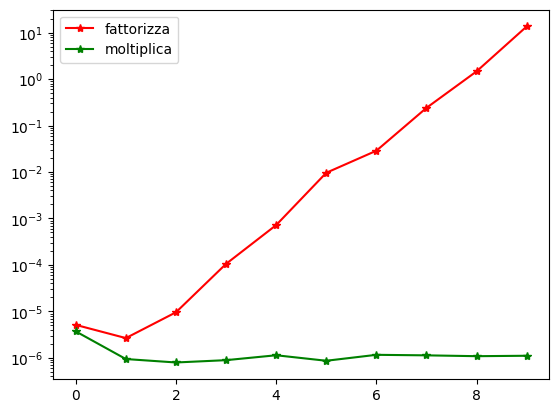

In [68]:
f = [
 7,
 83,
 929,
 6089,
 58543,
 158527,
 1508711,
 10507951,
 105072001,
 1050702811
]

plt.plot([
  cronometra(lambda : fattorizza(moltiplica(f[:i + 1]))) for i in range(len(f))
], '*-', label = 'fattorizza', c = 'red')
plt.plot([
  cronometra(lambda : moltiplica(f[:i + 1])) for i in range(len(f))
], '*-', label = 'moltiplica', c = 'green')
plt.yscale('log')
plt.legend();

<img src="./img/Euler.jpeg" style="width: 40%; margin: auto; display: block;" />

$$\Huge \varphi(n) \triangleq  |\{i \in\mathbb{N} \mid i < n, i \perp n\}|$$

&nbsp;

$$\Huge m \perp n \Rightarrow [m]^{\varphi(n)}_n = [1]_n$$

&nbsp;

$$\Huge \left([m]^{\varphi(n)}\right)^k = [1]^k$$

&nbsp;

$$\Huge [m] \cdot [m]^{k\cdot \varphi(n)} = [m] \cdot [1]$$

&nbsp;

$$\Huge [m]^{1 + k\cdot \varphi(n)} = [m]$$

$$\Huge ed = 1 + k\cdot \varphi(n)$$

&nbsp;

$$\Huge [ed]_{\varphi(n)} = [1]_{\varphi(n)}$$

&nbsp;

$$\Huge [d]_{\varphi(n)} = [e]^{-1}_{\varphi(n)}$$

$$\Huge a \perp b \Rightarrow \varphi(a\cdot b) = \varphi(a) \cdot \varphi(b)$$

$$\Huge \varphi(p) = p - 1$$

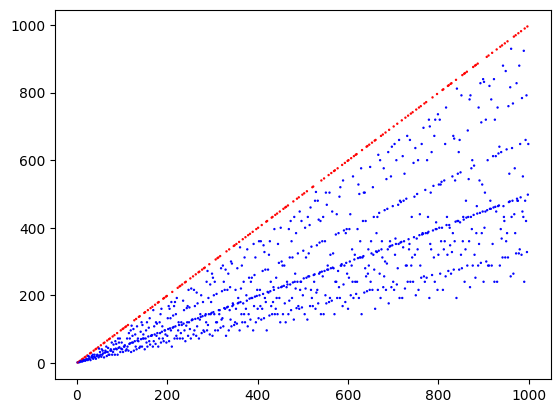

In [69]:
N = list(range(1, 1000))
plt.scatter(
  N, 
  [φ(n) for n in N], s = .5, 
  color = ['r' if è_primo(n) else 'b' for n in N]
);

$$\Huge p, q, e \mapsto n, d$$

&nbsp;

$$\Huge
\begin{cases}
p, q \mapsto p \cdot q = n\\
p, q, e \mapsto [e]^{-1}_{(p - 1)(q - 1)} = [d]_{(p - 1)(q - 1)}
\end{cases}
$$

$$\Huge f([m]_n, x)$$

&nbsp;

In [70]:
def f(m, n, x):
  M = Mod(n)
  return (M[m] ** x).rappresentante()

In [71]:
p = 55202166624234742076825422018198552545568721350927
q = 43045972142075202331028535612422134545369845034403
e = 65537

In [72]:
n = p * q

In [73]:
M = Mod((p - 1)*(q - 1))
d = (M[e] ** (-1)).rappresentante()
d

701154365630284037290881701138012383299504419581543080721910924221824588942701573338487759909677721

In [74]:
prv = (n, e)
pub = (n, d)

In [75]:
m = a_numero('Bella lì!')
m

313547121747086721395745

In [76]:
MCD(m, n) == 1

True

In [77]:
c = f(m, *pub)
c

1538783477976996928634014774512899410342179052487146901742256323416866179187484958304791756168895087

In [78]:
da_numero(f(c, *prv))

'Bella lì!'

<center>

## Firma digitale

</center>

In [79]:
s = f(m, *prv)
s

889083638752155628545502045048817268794357067783608461028896573341592978755168396208918521167789527

In [80]:
da_numero(f(s, *pub))

'Bella lì!'

<center>

# Bibliografia e sitografia

</center>

* Libri

  David Kahn, "The Codebreakers: The Story of Secret Writing", Macmillan, 1967;
  
  Simon Singh, "The code Book: The Science of Secrecy from Ancient Egypt to Quantum Cryptography", 2000.

* YouTube

  [Diffie-Hellman Key Exchange](https://youtu.be/YEBfamv-_do) e 
  [RSA Encryption Algorithm](https://youtu.be/wXB-V_Keiu8).

* Wikipedia

  [Modular arithmetic](https://www.wikiwand.com/en/Modular_arithmetic),
  [Extended Euclidean algorithm](https://www.wikiwand.com/en/Extended_Euclidean_algorithm),
  [Euler's totient function](https://www.wikiwand.com/en/Euler's_totient_function),
  [Euler's theorem](https://www.wikiwand.com/en/Euler%27s_theorem),
  [Bezout's identity](https://www.wikiwand.com/en/B%C3%A9zout's_identity),
  [Diffie-Hellman key exchange](https://www.wikiwand.com/en/Diffie%E2%80%93Hellman_key_exchange),
  [RSA](https://www.wikiwand.com/en/RSA_(cryptosystem)).

* Altro

  [Big Ideas of Cryptography in K-12](https://bigideascryptok12.bitbucket.io/).